In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #pyplot used when we want to plot nos
from matplotlib import style
%matplotlib inline  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
#Import the three datasets
mv_data=pd.read_csv('movies.dat',sep='::',header=None,names=['MovieID','Title','Genres'])
ratings_data = pd.read_csv('ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
users_data=pd.read_csv('users.dat',sep='::',header=None,names=['UserID','Gender','Age','Occupation','Zip-code'])

In [3]:
mv_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation
mv_data=mv_data.rename(columns={'MovieID': 'movie_id'})
mv_data.head()

,movie_id,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
mv_data.dtypes

movie_id     int64
Title       object
Genres      object
dtype: object

In [6]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
users_data=users_data.rename(columns={'UserID': 'user_id'})
users_data.head()

,user_id,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
#Merging Two datasets
two_data=pd.merge(mv_data,ratings_data,on ='movie_id')
two_data.head()

,movie_id,Title,Genres,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [9]:
##Merging Three datasets
three_data= pd.merge(two_data,users_data,on ='user_id')
three_data.head()

,movie_id,Title,Genres,user_id,rating,timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [10]:
# master_data with given features
master_data = three_data[['movie_id','Title','user_id','Age','Gender', 'Occupation','rating']]
master_data.head()

,movie_id,Title,user_id,Age,Gender,Occupation,rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5


In [11]:
master_data.describe

<bound method NDFrame.describe of          movie_id                                      Title  user_id  Age  \
0               1                           Toy Story (1995)        1    1   
1              48                          Pocahontas (1995)        1    1   
2             150                           Apollo 13 (1995)        1    1   
3             260  Star Wars: Episode IV - A New Hope (1977)        1    1   
4             527                    Schindler's List (1993)        1    1   
...           ...                                        ...      ...  ...   
1000204      3513                 Rules of Engagement (2000)     5727   25   
1000205      3535                     American Psycho (2000)     5727   25   
1000206      3536                   Keeping the Faith (2000)     5727   25   
1000207      3555                               U-571 (2000)     5727   25   
1000208      3578                           Gladiator (2000)     5727   25   

        Gender  Occupation  r

In [12]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   user_id     1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int64 
 6   rating      1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [13]:
master_data.shape

(1000209, 7)

In [14]:
# function for finding missing values
def missing_values_table(master_data):
        mis_val = master_data.isnull().sum()
        mis_val_percent = 100 * master_data.isnull().sum() / len(master_data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(master_data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


In [15]:
missing_values_table(master_data) # no any missing value in the given dataset

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# 1. User Age Distribution

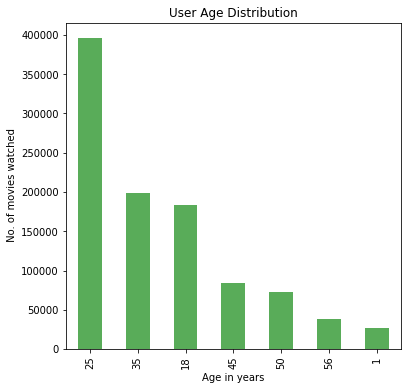

In [16]:

plt.figure(figsize=(6,6))
master_data['Age'].value_counts().plot(kind='bar',color='g',alpha=.65) #
plt.xlabel('Age in years')
plt.ylabel(" No. of movies watched")
plt.title("User Age Distribution")
plt.show()
#25 year to 34 year old peoples have seen most of the movies then the 35 to 44 yr and
# peoples from the age more than 18 yrs had seen the movies very frequently 

<AxesSubplot:>

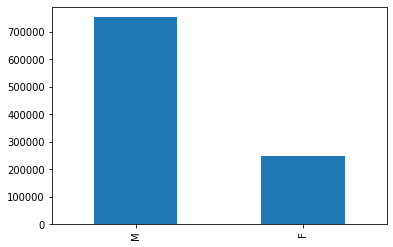

In [17]:
master_data['Gender'].value_counts().plot(kind='bar')
# Males are more likely to watch the movies than the females 

<AxesSubplot:>

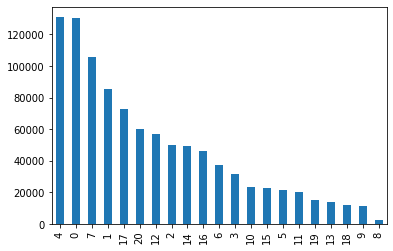

In [18]:
master_data['Occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

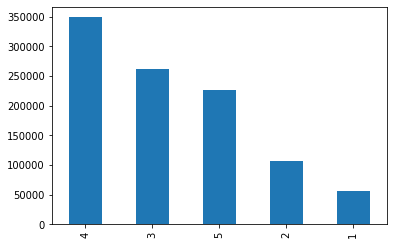

In [19]:
master_data['rating'].value_counts().plot(kind='bar')

# 2.User rating of the movie “Toy Story”


In [22]:
Toy_story = master_data.loc[master_data['Title']=='Toy Story (1995)']
print (Toy_story)

        movie_id             Title  user_id  Age Gender  Occupation  rating
0              1  Toy Story (1995)        1    1      F          10       5
53             1  Toy Story (1995)        6   50      F           9       4
124            1  Toy Story (1995)        8   25      M          12       4
263            1  Toy Story (1995)        9   25      M          17       5
369            1  Toy Story (1995)       10   35      F           1       5
...          ...               ...      ...  ...    ...         ...     ...
575166         1  Toy Story (1995)     6022   25      M          17       5
575214         1  Toy Story (1995)     6025   25      F           1       5
575485         1  Toy Story (1995)     6032   45      M           7       4
575589         1  Toy Story (1995)     6035   25      F           1       4
575869         1  Toy Story (1995)     6040   25      M           6       3

[2077 rows x 7 columns]


In [23]:
 # Total 2077 records are available for the movie Toy Story

In [24]:
Toy_story['rating'].value_counts() # most of the users have given 4 rating for this movie 

4    835
5    820
3    345
2     61
1     16
Name: rating, dtype: int64

Text(0.5, 1.0, 'Ratings of the movie “Toy Story”')

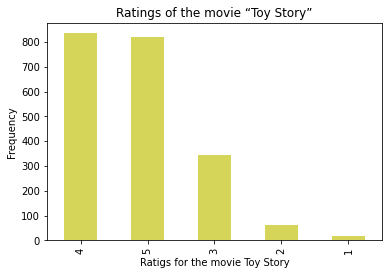

In [25]:
Toy_story['rating'].value_counts().plot.bar(color='y',alpha=0.65)
plt.xlabel('Ratigs for the movie Toy Story')
plt.ylabel('Frequency')
plt.title('Ratings of the movie “Toy Story”')

# Top 25 movies by viewership rating

In [26]:
master_data_grouped=master_data.groupby(['Title']).agg({'rating':'sum'})
master_data_grouped.head()

,rating
Title,
"$1,000,000 Duck (1971)",112
'Night Mother (1986),236
'Til There Was You (1997),140
"'burbs, The (1989)",882
...And Justice for All (1979),739


In [27]:
master_data_sort=master_data_grouped.sort_values(['rating'],ascending=False)
master_data_sort.head(25)
#Top 25 Movies which has higher ratings

,rating
Title,
American Beauty (1999),14800
Star Wars: Episode IV - A New Hope (1977),13321
Star Wars: Episode V - The Empire Strikes Back (1980),12836
Star Wars: Episode VI - Return of the Jedi (1983),11598
Saving Private Ryan (1998),11507
Raiders of the Lost Ark (1981),11257
"Silence of the Lambs, The (1991)",11219
"Matrix, The (1999)",11178
"Sixth Sense, The (1999)",10835


In [28]:
master_data_grouped2=master_data.groupby(['Title','user_id']).agg({'rating':'sum'})
master_data_grouped2.head()

rating
Title                  user_id        
$1,000,000 Duck (1971) 216           2
                       494           5
                       714           4
                       869           1
                       1034          3

# Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [29]:
User2696 = master_data.loc[master_data['user_id']==2696]
print (User2696)

        movie_id                                           Title  user_id  \
991035       350                              Client, The (1994)     2696   
991036       800                                Lone Star (1996)     2696   
991037      1092                           Basic Instinct (1992)     2696   
991038      1097               E.T. the Extra-Terrestrial (1982)     2696   
991039      1258                             Shining, The (1980)     2696   
991040      1270                       Back to the Future (1985)     2696   
991041      1589                                 Cop Land (1997)     2696   
991042      1617                        L.A. Confidential (1997)     2696   
991043      1625                                Game, The (1997)     2696   
991044      1644          I Know What You Did Last Summer (1997)     2696   
991045      1645                    Devil's Advocate, The (1997)     2696   
991046      1711  Midnight in the Garden of Good and Evil (1997)     2696   

In [30]:
User2696.rating # ratings given by the user 2696

991035    3
991036    5
991037    4
991038    3
991039    4
991040    2
991041    3
991042    4
991043    4
991044    2
991045    4
991046    4
991047    4
991048    4
991049    4
991050    2
991051    4
991052    1
991053    4
991054    1
Name: rating, dtype: int64

# Feature Engineering:

In [31]:
# 1. Find out all the unique genres 

Genres_data = three_data['Genres'].str.get_dummies('|')
print(Genres_data) 
# in Total there are 18 unique genres are available in the given dataset

         Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0             0          0          1           1       1      0            0   
1             0          0          1           1       0      0            0   
2             0          0          0           0       0      0            0   
3             1          1          0           0       0      0            0   
4             0          0          0           0       0      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
1000204       0          0          0           0       0      0            0   
1000205       0          0          0           0       1      0            0   
1000206       0          0          0           0       1      0            0   
1000207       1          0          0           0       0      0            0   
1000208       1          0          0           0       0      0            0   

         Drama  Fantasy  Fi

In [32]:
Genres_data.columns 

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [33]:
##2. Create a separate column for 
#each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
model_data = three_data.join(three_data.pop('Genres').str.get_dummies('|'))
model_data.head()

,movie_id,Title,user_id,rating,timestamp,Gender,Age,Occupation,Zip-code,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,5,978824351,F,1,10,48067,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,978300760,F,1,10,48067,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,1,0


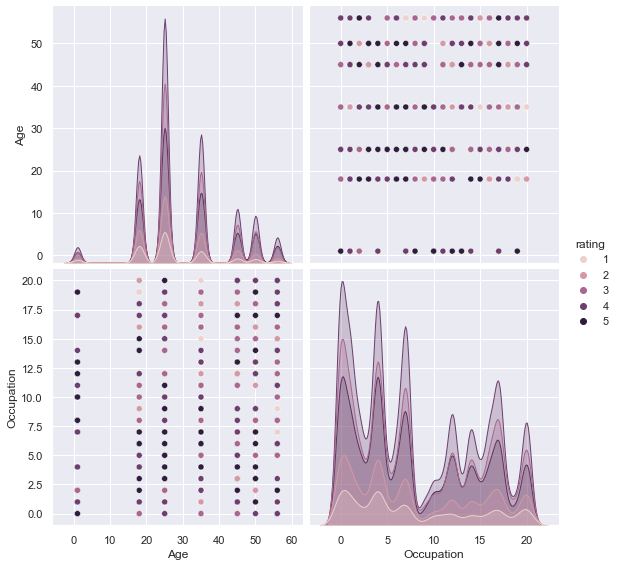

In [34]:
## 3. Determine the features affecting the ratings of any particular movie.
sns.set()
sns.pairplot(three_data[['Age','Gender','Occupation','rating']],
             hue = "rating",height=4)

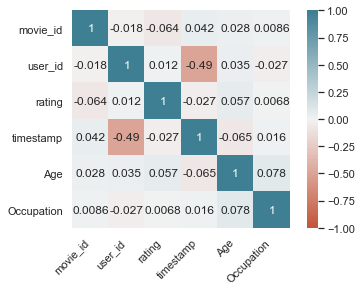

In [35]:

corr = three_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

from the pair plot and correlation plot we can conclude that there is no feature affecting the ratings of any particular movie

In [36]:
model_data1=model_data.iloc[:,np.r_[3, 5, 6, 9:27]]
model_data1.head()

,rating,Gender,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,F,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,F,1,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,5,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,F,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Develop an appropriate model to predict the movie ratings

In [37]:
# selecting the features for building model
model_data2=three_data[['movie_id','Age','Gender','Occupation','rating']]
model_data2.head()
model_data2.shape

(1000209, 5)

In [38]:
model_data2.dtypes

movie_id       int64
Age            int64
Gender        object
Occupation     int64
rating         int64
dtype: object

In [39]:
def gentoint(x):
    if (x=='F'):
     return 0
    if (x=='M'): 
     return 1
#gentoint('M')


In [40]:
model_data2['Gender']= model_data2['Gender'].apply(gentoint)

In [41]:
model_data2.dtypes

movie_id      int64
Age           int64
Gender        int64
Occupation    int64
rating        int64
dtype: object

In [42]:
# features data
X_features=model_data2[['movie_id','Age','Gender','Occupation']]

In [43]:
X_features

,movie_id,Age,Gender,Occupation
0,1,1,0,10
1,48,1,0,10
2,150,1,0,10
3,260,1,0,10
4,527,1,0,10
...,...,...,...,...
1000204,3513,25,1,4
1000205,3535,25,1,4
1000206,3536,25,1,4
1000207,3555,25,1,4


In [44]:
Y_target=model_data2['rating']

In [45]:
Y_target

0          5
1          5
2          5
3          4
4          5
          ..
1000204    4
1000205    2
1000206    5
1000207    3
1000208    5
Name: rating, Length: 1000209, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=0)

In [47]:
# Create a logistic regression model using the training set
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [48]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [49]:
#Evaluate the accuracy of your model
y_ped=logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_ped))
# logistic regression model gives 34% accuracy

0.34904170124273903


In [50]:
# use KNN classifier method - import it from sklearn
from sklearn.neighbors import KNeighborsClassifier
# instantiate the knn estimator
knn = KNeighborsClassifier(n_neighbors=6)

In [51]:
# fit data into KNN model (estimator)
knn.fit(X_features,Y_target)

KNeighborsClassifier(n_neighbors=6)

In [52]:
#Evaluate the accuracy of your model
y_ped=knn.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_ped))
#KNN model gives 46% accuracy

0.46815168814548946


In [53]:
# tried using other models so for that taking first 500 records from the dataset
#model_data2_500 =model_data2[500:]
first_500 = model_data2.head(500)
first_500.head

<bound method NDFrame.head of      movie_id  Age  Gender  Occupation  rating
0           1    1       0          10       5
1          48    1       0          10       5
2         150    1       0          10       5
3         260    1       0          10       4
4         527    1       0          10       5
..        ...  ...     ...         ...     ...
495      1197   35       0           1       5
496      1198   35       0           1       5
497      1200   35       0           1       5
498      1201   35       0           1       2
499      1203   35       0           1       3

[500 rows x 5 columns]>

In [54]:
X_features=first_500[['movie_id','Age','Gender','Occupation']]
Y_target=first_500['rating']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=0)

In [56]:
# Support Vector Machines
#pip install numpy scipy
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_features,Y_target)


SVC()

In [57]:
#Evaluate the accuracy of your model
y_ped=svc.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_ped))
#SVC is giving 35 % Accuracy

0.35


In [58]:
#Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_features,Y_target) 

In [59]:
#Evaluate the accuracy of your model
y_ped=gnb.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_ped))
## NAive base model is giving 42 % accuracy

0.42


## The best model for this dataset is KNN as it gives better results than the other models 
## i.e 46 %